In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\ebadu\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Only get data engineer jobs in the UK
df_DE_UK = df[(df['job_title_short'] == 'Data Engineer') & (df['job_country'] == 'United Kingdom')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DE_UK = df_DE_UK.dropna(subset=['salary_year_avg'])


In [6]:
df_DE_UK = df_DE_UK.explode('job_skills')

df_DE_UK[['salary_year_avg', 'job_skills']].head(5)



,salary_year_avg,job_skills
20817,147500.0,ruby
20817,147500.0,ruby
20817,147500.0,python
20817,147500.0,r
20817,147500.0,aws


In [7]:
df_de_top_pay = df_DE_UK.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_de_top_pay = df_de_top_pay.head(10)

df_de_top_pay

,count,median
job_skills,,
looker,2,148290.0
gitlab,3,147500.0
powershell,3,147500.0
pytorch,1,147500.0
ruby,4,147500.0
scikit-learn,1,147500.0
dax,2,147500.0
jira,3,147500.0
confluence,2,147500.0


In [8]:
df_de_skills = df_DE_UK.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_de_skills = df_de_skills.head(10).sort_values(by='median', ascending=False)

df_de_skills

,count,median
job_skills,,
snowflake,12,143358.0
spark,18,132910.5
azure,20,120790.0
gcp,13,110000.0
aws,40,103722.0
kafka,10,103386.5
sql,43,97444.0
python,39,97444.0
java,12,97108.5


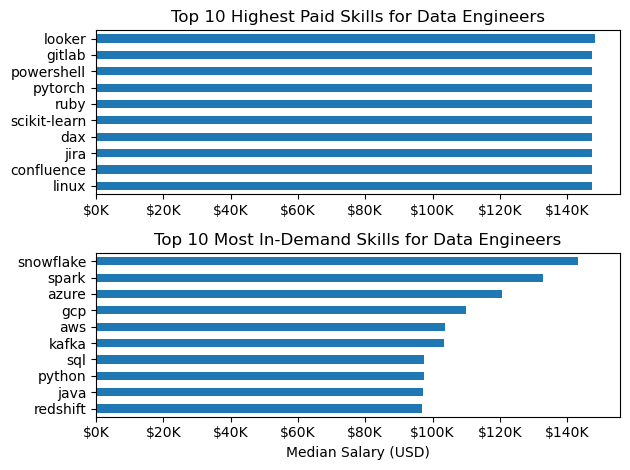

In [11]:
fig, ax = plt.subplots(2, 1)  

df_de_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Engineers')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts
df_de_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Engineers')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()